In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv("C:\\Users\\sulai\\Downloads\\force2020_data.csv")

In [7]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [11]:
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [15]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


## Dropping Duplicates if any

In [18]:
dup_rows = df.duplicated()
dup_rows
dup_rows.sum()

0

In [20]:
dup_cols = df.columns.duplicated()
dup_cols
dup_cols.sum()

0

In [22]:
df.shape

(18270, 6)

## Checking missing values

In [25]:
df.isna().sum()

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

In [27]:
num_df = df.select_dtypes(include='number')
cat_df = df.select_dtypes(include='object_')
num_df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [29]:
print("Numerical columns are:")
num_cols = num_df.columns.tolist()
print(num_cols)
print("Categorical columns are:")
cat_cols = cat_df.columns.tolist()
cat_cols

Numerical columns are:
['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC']
Categorical columns are:


[]

* Here there is no categorical columns are present.

### check histograms of numerical columns for data imputation

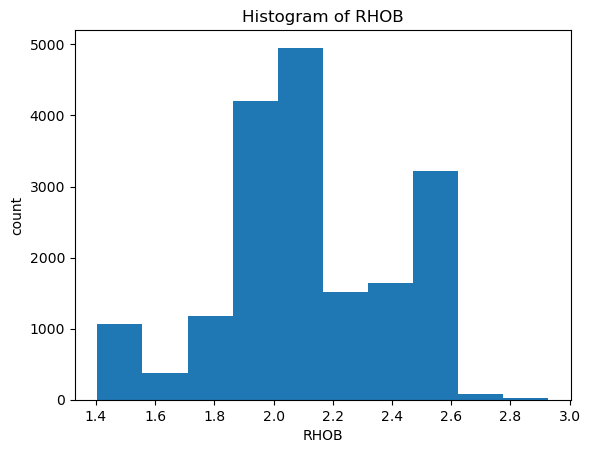

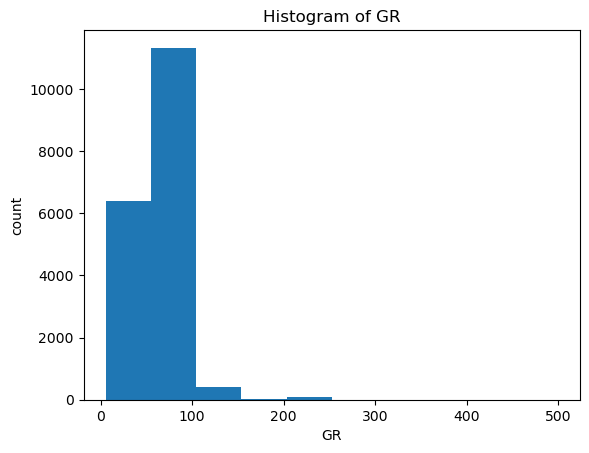

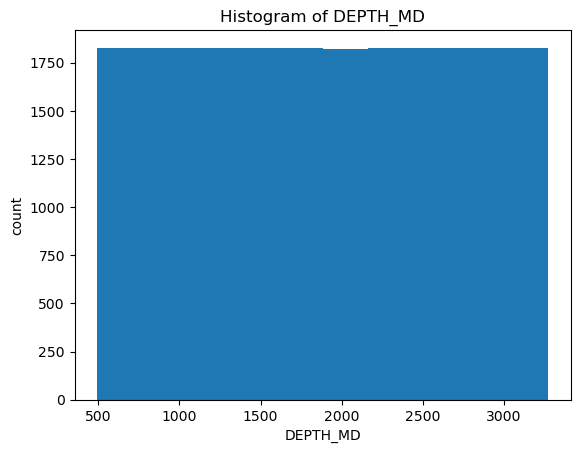

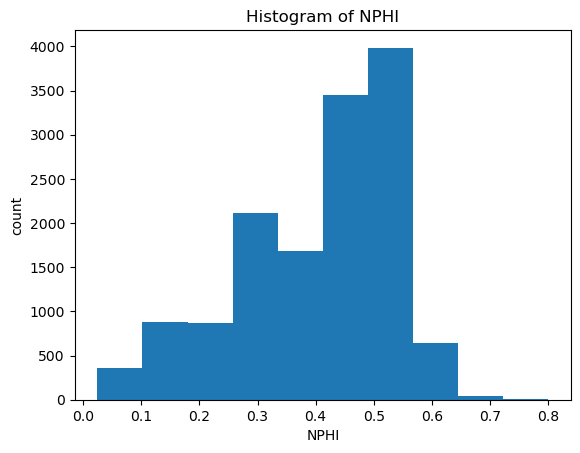

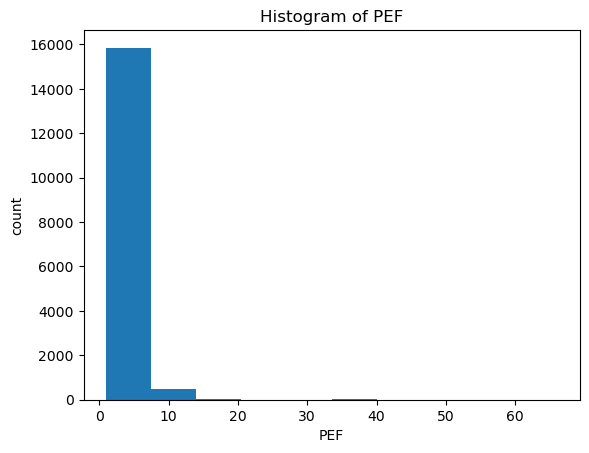

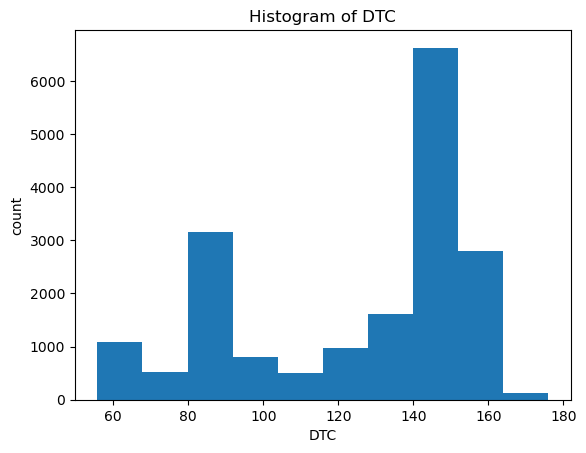

In [33]:
for col in num_cols:
    plt.hist(num_df[col])
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

## filling missing value for numerical columns

In [70]:
# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_cleaned = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [72]:
df.isna().sum()

RHOB        0
GR          0
DEPTH_MD    0
NPHI        0
PEF         0
DTC         0
dtype: int64

In [103]:
## Outlier Handling

<function matplotlib.pyplot.show(close=None, block=None)>

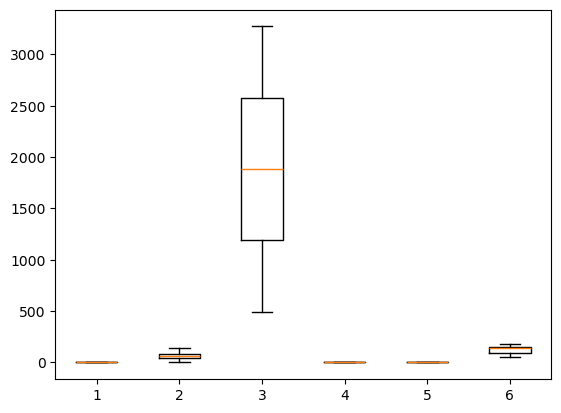

In [105]:
plt.boxplot(df)
plt.show

In [84]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,0.448527,6.583927,161.131180
1,1.889794,79.262886,494.680,0.448527,6.583927,160.603470
2,1.896523,74.821999,494.832,0.448527,6.583927,160.173615
3,1.891913,72.878922,494.984,0.448527,6.583927,160.149429
4,1.880034,71.729141,495.136,0.448527,6.583927,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,2.790249,141.300461
18266,2.643114,21.444370,3271.568,0.185574,2.790249,141.300461
18267,2.681300,22.646879,3271.720,0.176074,2.790249,141.300461
18268,2.738337,22.253584,3271.872,0.174617,2.790249,141.300461


# Standardize the data for better clustering

In [97]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

## K means

In [58]:
from sklearn.cluster import KMeans

In [91]:
kmeans = KMeans(n_clusters=3, random_state=42)
data_cleaned['Cluster'] = kmeans.fit_predict(data_scaled)
kmeans

KMeans(n_clusters=3, random_state=42)

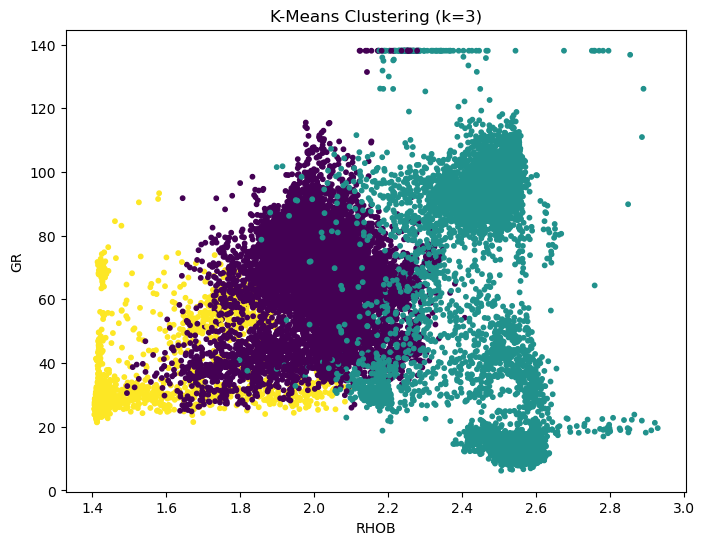

In [95]:
plt.figure(figsize=(8, 6))
plt.scatter(data_cleaned.iloc[:, 0], data_cleaned.iloc[:, 1], c=data_cleaned['Cluster'], cmap='viridis', s=10)
plt.title('K-Means Clustering (k=3)')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()


# Experiment with different K values and plot the result

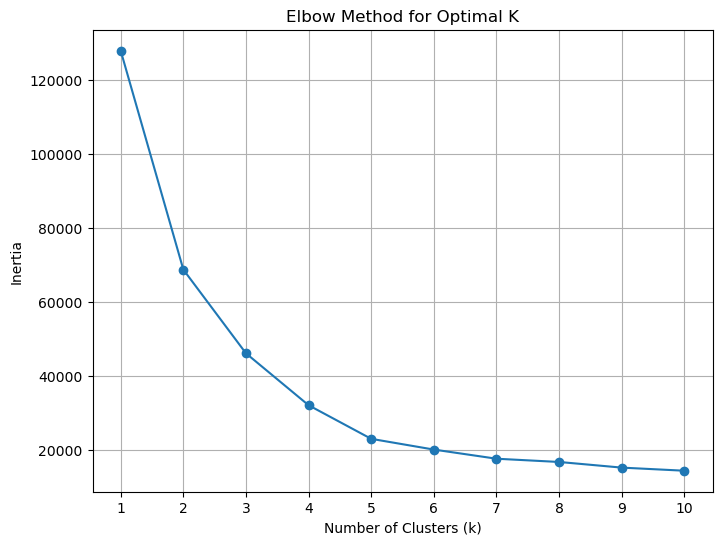

In [114]:
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()
